In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch

print("Torch version:{}".format(torch.__version__))
print("cuda version: {}".format(torch.version.cuda))
print("cudnn version:{}".format(torch.backends.cudnn.version()))

Torch version:1.7.0+cu101
cuda version: 10.1
cudnn version:7603


In [ ]:
#git 에서 darknet 다운로드
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.27 MiB | 7.51 MiB/s, done.
Resolving deltas: 100% (9995/9995), done.


In [ ]:
%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
##내 로컬 파일*(폴더)로 복사 명령어
%cp ./darknet /content/drive/My\ Drive/Colab\ Notebooks/darknet/bin/darknet

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolo4.conv.137

--2021-01-31 13:26:06--  https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolo4.conv.137
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-01-31 13:26:07 ERROR 404: Not Found.



In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/darknet/bin/darknet/dynamic

/content/drive/My Drive/Colab Notebooks/darknet/bin/darknet/dynamic


In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/darknet/bin/darknet/dynamic
!unzip /content/drive/My\ Drive/Colab\ Notebooks/darknet/bin/darknet/dynamic/01.학습데이터자료.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: 01.학습데이터자료/3_20201126_134158_000450.png  
  inflating: 01.학습데이터자료/3_20201126_134158_000450.png.json  
  inflating: 01.학습데이터자료/3_20201126_134158_000480.png  
  inflating: 01.학습데이터자료/3_20201126_134158_000480.png.json  
  inflating: 01.학습데이터자료/3_20201126_134158_000510.png  
  inflating: 01.학습데이터자료/3_20201126_134158_000510.png.json  
  inflating: 01.학습데이터자료/3_20201126_134158_000540.png  
  inflating: 01.학습데이터자료/3_20201126_134158_000540.png.json  
  inflating: 01.학습데이터자료/3_20201126_134158_000570.png  
  inflating: 01.학습데이터자료/3_20201126_134158_000570.png.json  
  inflating: 01.학습데이터자료/3_20201126_134158_000600.png  
  inflating: 01.학습데이터자료/3_20201126_134158_000600.png.json  
  inflating: 01.학습데이터자료/3_20201126_134158_000630.png  
  inflating: 01.학습데이터자료/3_20201126_134158_000630.png.json  
  inflating: 01.학습데이터자료/3_20201126_134158_000660.png  
  inflating: 01.학습데이터자료/3_20201126_134158_000660.png.json  
  inflating: 01.학습데이터자료/3_20201126_134158_00

In [ ]:
import json     #오케이 그냥 파일 하나씩 읽어오면서 땡기기
#data = str(input.read()).encode("string-escape").replace('/', '\')
all_json = None
for file in files :
    json_data = json.load(open(path + file))
    if all_json == None : all_json = json_data
    else : all_json['features'].extend(json_data['features'])

In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/darknet/bin/darknet/dynamic/01.학습데이터자료/
!rm *.json

/content/drive/My Drive/Colab Notebooks/darknet/bin/darknet/dynamic/01.학습데이터자료
rm: cannot remove '*.json': No such file or directory


In [ ]:
import os
import json  
from PIL import Image
#==============================================================================
def convert(size, box): 
  dw = 1./size[0] 
  dh = 1./size[1] 
  x = (box[0] + box[1])/2.0 
  y = (box[2] + box[3])/2.0 
  w = box[1] - box[0] 
  h = box[3] - box[2] 
  x =x*dw 
  w =w*dw 
  y =y*dh 
  h =h*dh
  return (x,y,w,h) 
#==============================================================================
path = '/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/01.학습데이터자료/'
files = os.listdir(path)
#data = str(input.read()).encode("string-escape").replace('/', '\')
dic={
    '일반차량' : 0,
    '목적차량(특장차)' : 0,
    '이륜차' : 1,
    '보행자' : 2
}
image_id='ab'
all=[];point=list()
count = 0;class_id=0;x=0;y=0;width=0;height=0       #count will be 1200
#==============================================================================
for file in files :
  if not 'json' in file:
    continue
  with open(path+file,'r') as input:     
    data=input.read()
  json_data = json.loads(data,strict=False)
  image_id=json_data['filename']
  height=json_data['metadata']['height']
  width=json_data['metadata']['width']
  #=============================================================================
  for properties in json_data['annotations']:          #annotation의 value들이 순차적으로 돌아감 (중괄호 3개)
      class_id=dic[properties['label']]                #중괄호 하나 안에 5개의 key들이 있는데 
      point=properties['points'].copy()        #2차원 list
      xmin=10000;xmax=0;ymin=10000;ymax=0
      for x in point:
        if (xmin > x[0]): xmin = x[0]
        if xmax < x[0]: xmax = x[0]
      for y in point:
        if (ymin > y[1]): ymin = y[1]
        if ymax < y[1]: ymax = y[1]
      b = (xmin, xmax, ymin, ymax)
      bb = convert((width,height), b)
      line=[]
      line.append(class_id);line.append(bb[0]);line.append(bb[1]);line.append(bb[2]);line.append(bb[3])
      all.append(line)
  for i in image_id:
        if i == '.':
          image_id=image_id.split('.')[0]
          break
  f = open("/content/drive/MyDrive/tensorflow-yolov4-tflite/dataset/시발/"+image_id+".txt", 'w')
  for i in range(len(all)):
    f.write(' '.join(map(str,all[i])))
    f.write('\n')
  f.close()
  all.clear()
  count+=1
print(count)

0


**txt파일 압축하기**

파일안의 전체 내용을 옮기고 싶으면, 파일을 압축해서

원하는 파일 안에다가 풀어버리면 되지~

In [ ]:
#%cd '/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic'
#!tar czf 'file_txt'.tgz 'file_txt'
!tar czf '01.학습데이터자료'.tgz '01.학습데이터자료'

^C


In [ ]:
#명령어 참고 사이트
#01.학습데이터자료 파일의 json파일 싹다 지우기
%cd '/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/01.학습데이터자료'
!pwd
%rm *.json

/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/01.학습데이터자료
/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/01.학습데이터자료


In [ ]:
#directory1의 모든 txt 컨텐트를 directory2로 복사하기 (recursively)
%cd '/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/file_txt'
!cp -r *.txt '/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/01.학습데이터자료/'

/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/file_txt


In [ ]:
#아예 파일 전체를 복사 명령 내리기
%cd '/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/file_txt'
!cp -r *.txt '/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/01.학습데이터자료/'

**txt:9964개, png파일:10329개**

차이나는 이유: png 파일에 해당하는 json파일에 객체가, bounding box가 없던것이 365개가 있었음!!!!!

**지우기**

In [ ]:
import os
path = '/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/01.학습데이터자료/'
files = os.listdir(path)
count=0
name=[]
name_txt=[]
what=[]
for file in files :
  if 'txt' in file:
    continue
  a=str(file)
  b=a.split('.')
  name.append(b[0])
name.sort()
print(len(name))
for file in files :
  if 'png' in file:
    continue
  a=str(file)
  b=a.split('.')
  name_txt.append(b[0])
name_txt.sort()
print(len(name_txt))
for i in range(10329):
  count1=0                #flag가 중요
  for j in range(9964):
    if name[i] == name_txt[j]:
      count1+=1
      break
  if count1==0:
    what.append(name[i])

print(len(what))
what

#word_cnt=dict()
#for word in name: 
#    if word not in word_cnt.keys(): 
#        word_cnt[word] = 1 
#    else: 
#        word_cnt[word] += 1
#word_cnt
#for i in range(10329):
#  count+=word_cnt[name[i]]
#count
  #png파일일때 이름이 중복되면 중복 리스트에 담는다.===> 중복이 아니였음...

OSError: ignored

In [ ]:
#what 배열을 사용하기.
path = '/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/01.학습데이터자료/'
files = os.listdir(path)
for file in files :
  if 'png' in file:
    for a in what:
      if str(file) == (a+'.png'):
        path2 = path+a+'.png'
        os.remove(path2)

In [ ]:
import os
path = '/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/img/'
files = os.listdir(path)
for file in files :
  if 'json' in file:
        os.remove(path+file)

In [ ]:
#train_.txt파일 만들기
#총 10329개의 사진
#총 10329개의 json파일
import os
path = '/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/img/'
files = os.listdir(path)
print(len(files))
f = open("/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/train2_.txt", 'w')
count=0
for file in files :
  if 'png' in file:
    st='dynamic/img/'+str(file)
    f.write(st)
    f.write('\n')
    count+=1
f.close()
print(count)

212
106


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/dynamic/01.학습데이터자료/'
files = os.listdir(path)
dic={
    1.0 : 0,
    2.0 : 1,
    3.0 : 2
}
all=[]
count=0
#==============================================================================
for file in files :
  if not 'txt' in file:
    continue
  with open(path+file,'r') as input:        #with 블럭이 끝나면 자동으로 닫아줌
    data=input.readline()
    while data:
      data=list(map(float,data.split()))
      line=[]
      line.append(dic[data[0]]);line.append(data[1]);line.append(data[2]);line.append(data[3]);line.append(data[4])
      all.append(line)
      data = input.readline()
      if len(data)<=1:break
  f=open(path+file,'w')
  for i in range(len(all)):
    f.write(' '.join(map(str,all[i])))
    f.write('\n')
  f.close()
  for i in range(len(all)):
    print(all[i])
  all.clear()
  count+=1
print(count)
  #=============================================================================

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[0, 0.6325520833333333, 0.4916666666666667, 0.0359375, 0.07777777777777778]
[0, 0.64453125, 0.5328703703703704, 0.04739583333333333, 0.09537037037037037]
[0, 0.58828125, 0.5314814814814816, 0.05260416666666667, 0.05740740740740741]
[2, 0.3690104166666667, 0.5296296296296297, 0.008854166666666666, 0.04814814814814815]
[2, 0.5614583333333333, 0.5305555555555556, 0.009375, 0.05740740740740741]
[2, 0.14921875, 0.5606481481481481, 0.028645833333333332, 0.1564814814814815]
[2, 0.054427083333333334, 0.5893518518518519, 0.0140625, 0.1675925925925926]
[2, 0.5916666666666667, 0.5324074074074074, 0.015625, 0.09074074074074075]
[2, 0.5940104166666667, 0.5402777777777777, 0.011979166666666666, 0.09537037037037037]
[2, 0.5927083333333333, 0.5203703703703704, 0.016666666666666666, 0.05]
[0, 0.92265625, 0.6245370370370371, 0.1546875, 0.18055555555555555]
[2, 0.59296875, 0.5421296296296296, 0.0140625, 0.09351851851851853]
[2, 0.5934895833333333, 0.5416666666666667, 0

# **학습가자**

In [ ]:
#darknet 권한 변경 및 실행 테스트
%cd /content/drive/My\ Drive/Colab\ Notebooks/darknet/bin/darknet
!chmod +x ./darknet
!./darknet detector

/content/drive/My Drive/Colab Notebooks/darknet/bin/darknet
 CUDA-version: 10010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
usage: ./darknet detector [train/test/valid/demo/map] [data] [cfg] [weights (optional)]


**첫 학습 명령어**

In [ ]:
!./darknet detector train sia/sia2.DATA sia/sia.cfg sia/sia.137 -map -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.845403), count: 6, class_loss = 0.011228, iou_loss = 7.717120, total_loss = 7.728348 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.760441), count: 2, class_loss = 0.586569, iou_loss = 1.157980, total_loss = 1.744549 
 total_bbox = 525527, rewritten_bbox = 0.011607 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000005, iou_loss = 0.000000, total_loss = 0.000005 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.000000), count: 1, class_loss = 0.000021, iou_loss = 0.000000, total_loss = 0.000021 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 525527, rewritten_bbox = 0.011607 % 
v3 (iou loss, Nor

**이후에 계속 학습 이어갈 명령어**

In [ ]:
#!./darknet detector train sia/sia.DATA sia/sia.cfg backup_05/sia_last.weights -map -dont_show
!./darknet detector train sia/sia2.DATA sia/sia.cfg backup_01/sia_last.weights -map -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 435214, rewritten_bbox = 0.006663 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.869323), count: 3, class_loss = 0.005292, iou_loss = 36.924332, total_loss = 36.929623 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.795491), count: 1, class_loss = 0.006666, iou_loss = 2.038053, total_loss = 2.044719 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 435218, rewritten_bbox = 0.006663 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.779559), count: 2, class_loss = 1.402755, iou_loss = 28.825659, total_loss = 30.228415 
v3 (iou loss,

In [ ]:
!./darknet detector test sia/sia2.DATA sia/sia.cfg backup_01/sia_best.weights /content/ab.png

 CUDA-version: 10010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/5

In [ ]:
with open('./labels.json', 'w') as outfile:
    json.dump(all_json, outfile, indent='\t')

In [ ]:
!ls

In [ ]:
import json # import json module
with open('/content/drive/MyDrive/10th/simplified_rbox_cnn/Arirang_Dataset/train/labels.json') as json_file:
    json_data = json.load(json_file)

In [ ]:
from PIL import Image
def convert(size, box): 
  dw = 1./size[0] 
  dh = 1./size[1] 
  x = (box[0] + box[1])/2.0 
  y = (box[2] + box[3])/2.0 
  w = box[1] - box[0] 
  h = box[3] - box[2] 
  x = x*dw 
  w = w*dw 
  y = y*dh 
  h = h*dh 
  return (x,y,w,h) 

im=Image.open(img_path) 
w= int(im.size[0]) 
h= int(im.size[1]) 
print(xmin, xmax, ymin, ymax) #define your x,y coordinates 
b = (xmin, xmax, ymin, ymax) 
bb = convert((w,h), b)


In [ ]:
from PIL import Image
def convert(size, box): 
  dw = 1./size[0] 
  dh = 1./size[1] 
  x = (box[0] + box[1])/2.0 
  y = (box[2] + box[3])/2.0 
  w = box[1] - box[0] 
  h = box[3] - box[2] 
  x =x*dw 
  w =w*dw 
  y =y*dh 
  h =h*dh
  return (x,y,w,h) 

def doit(all,count,features,image_id):
            xmin=10000;xmax=0;ymin=10000;ymax=0
            image_id=features['properties']['image_id']
            count=count+1
            cost=[];cost2=[]
            cost=features['properties']['object_imcoords']
            for a in cost.split(','):
              cost2.append(float (a))
            im=Image.open(("/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/sia_pic/3/"+image_id)) 
            w= int(im.size[0]) 
            h= int(im.size[1])
            for i in range(0,8,2):
              if (xmin > cost2[i]): xmin = cost2[i]
              if xmax < cost2[i]: xmax = cost2[i]
            for i in range(1,8,2):
              if (ymin > cost2[i]): ymin = cost2[i]
              if ymax < cost2[i]: ymax = cost2[i]
            b = (xmin, xmax, ymin, ymax)
            bb = convert((w,h), b)
            class_id=features['properties']['type_id']
            line=[]
            line.append(class_id);line.append(bb[0]);line.append(bb[1]);line.append(bb[2]);line.append(bb[3])
            all.append(line)
            return count,all,image_id

count = 0;class_id=0;x=0;y=0;width=0;height=0       #count will be 1200
image_id='ab'
all=[]                                        #딕셔너리의 포인트: {}를 받아서 대표로 사용한다~~~~!
for features in json_data["features"]:        #이거 코드 그대로 해석하면, json_data의 key중에 feature와 type이 있는데, 그중에서 feature key의 value들을 한바퀴씩 돌리는데~
  for properties in features["properties"]:   #그때 이 value들이 list로 구성되어 있으니, 이때 각 요소들은 {}한개씩으로 구성되어있고, 이때  feature key의 value중 properties로 들어가는데~
                                              #첫번째 for문 시작과 두번쨰 for문 마지막의 feature는 각 {}들을 지칭하는거
      #if count == 100: break
      if properties == 'image_id':
        if len(image_id)>4:
          if image_id != features['properties']['image_id']:
            for i in image_id:
              if i == '.':
                image_id=image_id.split('.')[0]
                break
            f = open("/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/sia_pic/tx/"+image_id+".txt", 'w')
            for i in range(len(all)):
              if all[i][0] != '16':
                f.write(' '.join(map(str,all[i])))
                f.write('\n')
            f.close()
            for i in range(len(all)):
              print(all[i])
            all.clear()
            count,all,image_id = doit(all,count,features,image_id)
            print('====================================')

          else:
            count,all,image_id = doit(all,count,features,image_id)

        else:
          count,all,image_id = doit(all,count,features,image_id)
  #if count == 100: break
for i in image_id:
  if i == '.':
    image_id=image_id.split('.')[0]
    break
f = open("/content/drive/MyDrive/Colab Notebooks/darknet/bin/darknet/sia_pic/tx/"+image_id+".txt", 'w')
for i in range(len(all)):
  if all[i][0] != '16':
    f.write(' '.join(map(str,all[i])))
    f.write('\n')
f.close()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['1', 0.2932385427031545, 0.8494975315986684, 0.009153912698514843, 0.0204615968805113]
['1', 0.2840866774112173, 0.8241231814925093, 0.008760145768056615, 0.017478249470301854]
['1', 0.2580429939903045, 0.849153110139907, 0.008851673324696163, 0.01947114940614303]
['1', 0.2580148723967085, 0.8236668400406079, 0.008499926830976667, 0.020210968856460898]
['1', 0.22242361473187633, 0.8228526398547664, 0.008803425054177416, 0.01884521040223941]
['1', 0.23003162320880985, 0.8481277221978623, 0.008869128369280499, 0.020354725878946045]
['1', 0.22142139268945632, 0.8485190963123783, 0.00873050640063655, 0.02030143301091636]
['1', 0.20190833087904794, 0.8925373521112304, 0.008562142792085503, 0.017734935012980957]
['1', 0.21017336925369628, 0.8933287369543227, 0.008562142792085503, 0.017734935012980957]
['1', 0.17769366906631331, 0.9164392928568837, 0.008562142792085503, 0.017734935012980957]
['1', 0.18463081174057464, 0.9173098159490086, 0.0070293908722341

In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/darknet/bin/darknet/sia_pic
!unzip /content/drive/My\ Drive/Colab\ Notebooks/darknet/bin/darknet/sia_pic/3.zip

/content/drive/My Drive/Colab Notebooks/darknet/bin/darknet/sia_pic
Archive:  /content/drive/My Drive/Colab Notebooks/darknet/bin/darknet/sia_pic/3.zip
  inflating: 3/OBJ00013_PS3_K3_NIA0078.txt  
  inflating: 3/OBJ00022_PS3_K3_NIA0078.txt  
  inflating: 3/OBJ00028_PS3_K3_NIA0078.txt  
  inflating: 3/OBJ00113_PS3_K3_NIA0080.txt  
  inflating: 3/OBJ00135_PS3_K3_NIA0080.txt  
  inflating: 3/OBJ00189_PS3_K3_NIA0081.txt  
  inflating: 3/OBJ00258_PS3_K3_NIA0081.txt  
  inflating: 3/OBJ00261_PS3_K3_NIA0081.txt  
  inflating: 3/OBJ00291_PS3_K3_NIA0081.txt  
  inflating: 3/OBJ00318_PS3_K3_NIA0082.txt  
  inflating: 3/OBJ00348_PS3_K3_NIA0083.txt  
  inflating: 3/OBJ00388_PS3_K3_NIA0084.txt  
  inflating: 3/OBJ00400_PS3_K3_NIA0084.txt  
  inflating: 3/OBJ00408_PS3_K3_NIA0084.txt  
  inflating: 3/OBJ00451_PS3_K3_NIA0084.txt  
  inflating: 3/OBJ00468_PS3_K3_NIA0084.txt  
  inflating: 3/OBJ00511_PS3_K3_NIA0084.txt  
  inflating: 3/OBJ00578_PS3_K3_NIA0085.txt  
  inflating: 3/OBJ00656_PS3_K3_NIA0088

# **학습 가보자**

In [ ]:
#darknet 권한 변경 및 실행 테스트
%cd /content/drive/My\ Drive/Colab\ Notebooks/darknet/bin/darknet
!chmod +x ./darknet
!./darknet detector

/content/drive/My Drive/Colab Notebooks/darknet/bin/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
usage: ./darknet detector [train/test/valid/demo/map] [data] [cfg] [weights (optional)]


**최초학습**

In [ ]:
!./darknet detector train sia/sia.DATA sia/sia.cfg sia/sia.137 -dont_show

**추가학습위해서는 이전의 가중치를 이용해야지**

아래 두개 사이트는 data set 8:2로 나누는거랑, data set 정확도 그래프 보는 법 참고할 수 있는 사이트

https://blog.roboflow.com/mean-average-precision/

https://blog.roboflow.com/train-test-split/

In [ ]:
!./darknet detector train sia/sia.DATA sia/sia.cfg backup_05/sia_last.weights -dont_show
#중간에 끊고 내일 다시할라면 sia/sia.137자리를 backup_05/sia_2000.weights 같은거 넣으면 됨

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.393192), count: 2, class_loss = 3.066209, iou_loss = 1.007191, total_loss = 4.073400 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000584, iou_loss = 0.000000, total_loss = 0.000584 
 total_bbox = 8629215, rewritten_bbox = 10.625660 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.455103), count: 183, class_loss = 171.482559, iou_loss = 4259.126465, total_loss = 4430.608887 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.288071), count: 2, class_loss = 3.154944, iou_loss = 0.293238, total_loss = 3.448182 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.536904), count: 5, class_loss = 6.254080, iou_loss = 1.628137, total_loss = 7.882216 
 total_bbox = 8629405, rewritten_bbox = 10.625751 % 
v3 

# **나머지 자세한 명령어는 역시 github 참고!!**

https://github.com/AlexeyAB/darknet#how-to-train-to-detect-your-custom-objects

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/5

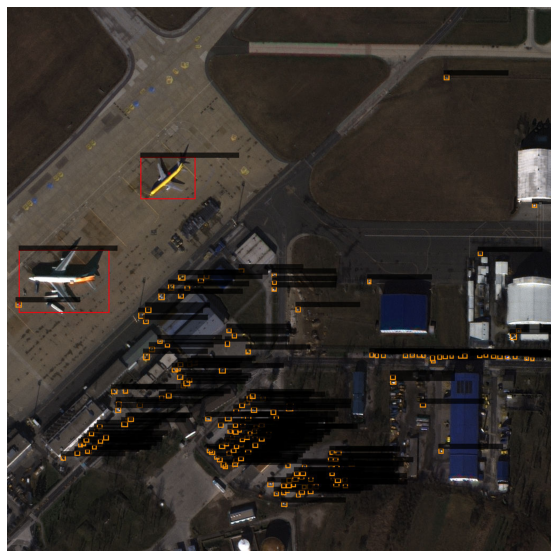

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

!./darknet detector test sia/sia.DATA sia/sia.cfg backup_05/sia_last.weights test/OBJ04450_PS3_K3A_NIA0292.png
imShow('predictions.jpg')

In [ ]:
def min_max_normalize(size,lst):
    min=10000
    max=0
    for i in range(len(lst)):
      for j in range(1,len(lst[i])):
        if min > float (lst[i][j]):
          min=float (lst[i][j])
        if max < float (lst[i][j]):
          max=float (lst[i][j])
    
    normalized_2vector = []
    for i in range(len(lst)):
      normalized = []
      for j in range(len(lst[i])):
        if j==0:
          normalized_num=int (lst[i][0])
        else:
          normalized_num = (float (lst[i][j]) - min) / (max - min)     #2차원 min을 인식 못하네, 1차원만 인식 가능하구나
          if normalized_num==1.0:
            normalized_num=0.9999888888888888
          elif normalized_num==0.0:
            normalized_num=0.0011111333222222
        normalized.append(str (normalized_num))
      normalized_2vector.append(normalized)
    return normalized_2vector

def boo(a,b):
  if a<0:
    a=(-a)
  if b<0:
    b=(-b)
  return a,b


#count = 0
image_id='abc'
image_id2='abc'
class_id=0
x=0
y=0
width=0
height=0
all=[]
for features in json_data["features"]:
  for properties in features["properties"]:
      if count == 1: break

      if properties == 'object_imcoords':
        cost=[];cost2=[]
        cost=features['properties']['object_imcoords']
        for a in cost.split(','):
          cost2.append(float (a))
        x=(cost2[0]+ cost2[2]+cost2[4]+cost2[6]) / 4
        y=(cost2[1]+ cost2[3]+cost2[5]+cost2[7]) / 4
        width =cost2[2]-cost2[0];height=cost2[3]-cost2[1]
        width,height = boo(width,height)
      
      if properties == 'type_id':
        class_id=features['properties']['type_id']
        line=[]
        line.append(class_id);line.append(x);line.append(y);line.append(width);line.append(height)
        all.append(line)


      if properties == 'image_id':
        if len(image_id)>4:
          if image_id != features['properties']['image_id']:
            all=min_max_normalize(all).copy()
            f = open("/content/drive/MyDrive/10th/simplified_rbox_cnn/Arirang_Dataset/"+image_id+".txt", 'w')
            for i in range(len(all)):
              f.write(' '.join(all[i]))
              f.write('\n')
            f.close()
            image_id=features['properties']['image_id']
            count=count+1
            for i in range(len(all)):
              print(all[i])
            all.clear()

        else:
          image_id=features['properties']['image_id']
      print('====================================')     

In [ ]:
image_id='abc'
f = open("/content/drive/MyDrive/10th/simplified_rbox_cnn/Arirang_Dataset/train/4/train_.txt", 'w')
for features in json_data["features"]:
  for properties in features["properties"]:
      if properties == 'image_id':
        image_id=features['properties']['image_id']
        f.write('sia_pic/3/'+image_id+'\n')
      print('====================================')
f.close()